# 1 часть

# 1.1

In [8]:
import json
import csv

with open('sales.json') as file:
    json_file = json.load(file)
    csv_file = csv.writer(open("sales.csv", "w",encoding='utf8',newline=''))
    csv_file.writerow(['item','country','year','sales'])
    for item in json_file:
        for country in item["sales_by_country"]:
            for year in item["sales_by_country"][country].items():
                csv_file.writerow([item["item"],country, year[0], year[1]])

In [9]:
file = open('sales.csv')
file.readlines()

['item,country,year,sales\n',
 'sweater,Russia,2010,85\n',
 'sweater,Russia,2011,10\n',
 'sweater,Russia,2012,104\n',
 'sweater,Russia,2013,59\n',
 'sweater,Russia,2014,113\n',
 'sweater,Russia,2015,21\n',
 'sweater,Russia,2016,23\n',
 'sweater,Russia,2017,94\n',
 'sweater,Russia,2018,134\n',
 'sweater,Russia,2019,152\n',
 'sweater,Belarus,2010,34\n',
 'sweater,Belarus,2011,87\n',
 'sweater,Belarus,2012,91\n',
 'sweater,Belarus,2013,71\n',
 'sweater,Belarus,2014,44\n',
 'sweater,Belarus,2015,61\n',
 'sweater,Belarus,2016,124\n',
 'sweater,Belarus,2017,82\n',
 'sweater,Belarus,2018,33\n',
 'sweater,Belarus,2019,85\n',
 'sweater,Ukraine,2010,53\n',
 'sweater,Ukraine,2011,39\n',
 'sweater,Ukraine,2012,32\n',
 'sweater,Ukraine,2013,102\n',
 'sweater,Ukraine,2014,121\n',
 'sweater,Ukraine,2015,103\n',
 'sweater,Ukraine,2016,100\n',
 'sweater,Ukraine,2017,64\n',
 'sweater,Ukraine,2018,49\n',
 'sweater,Ukraine,2019,143\n',
 'sweater,Lithuania,2010,100\n',
 'sweater,Lithuania,2011,34\n',
 'swe

# 1.2 

In [10]:
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import datetime as dt
import csv
import requests
import codecs

In [16]:
current_date = dt.datetime.today().strftime('%d/%m/%Y')
# usd
response = requests.get(f'https://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=01/01/2021&date_req2={current_date}&VAL_NM_RQ=R01235'.format(current_date))
usd_tree = ET.fromstring(response.content)
# eur
response = requests.get(f'https://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=01/01/2021&date_req2={current_date}&VAL_NM_RQ=R01239'.format(current_date))
eur_tree = ET.fromstring(response.content)
# jpy
response = requests.get(f'https://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=01/01/2021&date_req2={current_date}&VAL_NM_RQ=R01820'.format(current_date))
jpy_tree = ET.fromstring(response.content)
# uah
response = requests.get(f'https://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=01/01/2021&date_req2={current_date}&VAL_NM_RQ=R01720'.format(current_date))
uah_tree = ET.fromstring(response.content)

In [17]:
dates = []
usd_values = []
eur_values = []
jpy_values = []
uah_values = []

for child in usd_tree:
    usd_values.append(float((child[1].text).replace(',','.',-1))/float((child[0].text)))
    dates.append(dt.datetime.strptime(child.attrib["Date"], "%d.%m.%Y").date())
    
for child in eur_tree:
    eur_values.append(float((child[1].text).replace(',','.',-1))/float((child[0].text)))

for child in jpy_tree:
    jpy_values.append(float((child[1].text).replace(',','.',-1))/float((child[0].text)))
    
for child in uah_tree:
    uah_values.append(float((child[1].text).replace(',','.',-1))/float((child[0].text)))

In [18]:
with open('currencies.csv', 'w', encoding='utf8', newline='') as file:
    csv_file = csv.writer(file)
    csv_file.writerow(['Date','USD','EUR','JPY','UAH'])
    for i in range(len(dates)):
        csv_file.writerow([dates[i], usd_values[i], eur_values[i], jpy_values[i], uah_values[i]])

file = open('currencies.csv')
file.readlines()

['Date,USD,EUR,JPY,UAH\n',
 '2021-01-01,73.8757,90.7932,0.716058,2.60711\n',
 '2021-01-12,74.5157,90.8123,0.715706,2.63772\n',
 '2021-01-13,74.2663,90.3227,0.712694,2.6486\n',
 '2021-01-14,73.5264,89.7831,0.708791,2.62785\n',
 '2021-01-15,73.7961,89.6475,0.7093389999999999,2.63277\n',
 '2021-01-16,73.5453,89.2546,0.7092459999999999,2.6224\n',
 '2021-01-19,73.9735,89.3304,0.71286,2.6269\n',
 '2021-01-20,73.7243,89.2064,0.708922,2.61531\n',
 '2021-01-21,73.355,89.1483,0.7070019999999999,2.6054\n',
 '2021-01-22,73.3694,88.9677,0.708643,2.59742\n',
 '2021-01-23,74.3615,90.4087,0.717602,2.64044\n',
 '2021-01-26,74.8569,91.1458,0.721617,2.65898\n',
 '2021-01-27,75.6354,91.6701,0.7288049999999999,2.68792\n',
 '2021-01-28,75.04,91.2186,0.723591,2.66491\n',
 '2021-01-29,76.1854,92.131,0.730375,2.70022\n',
 '2021-01-30,76.2527,92.2963,0.728784,2.7094\n',
 '2021-02-02,75.5053,91.5426,0.720711,2.68977\n',
 '2021-02-03,75.9051,91.625,0.7232160000000001,2.70553\n',
 '2021-02-04,76.0801,91.5624,0.724

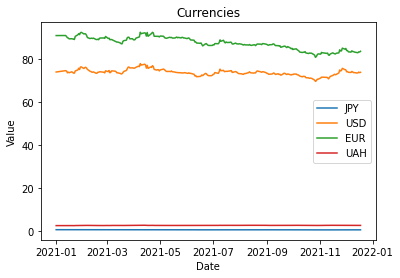

In [19]:
fig, ax = plt.subplots()
ax.plot(dates, jpy_values, label='JPY')
ax.plot(dates, usd_values, label='USD')
ax.plot(dates, eur_values, label='EUR')
ax.plot(dates, uah_values, label='UAH')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Currencies')
ax.legend()

# 2 часть

In [20]:
import random
import numpy as np
import matplotlib.pyplot as plt


# 2.1

In [9]:
x = np.random.uniform(-5, 5, size = (1, 5))
w = np.random.uniform(-5, 5, size = (1,5))
b = np.random.randint(15)
result = (x*w).sum() + b

In [10]:
x

array([[ 4.72268386,  1.73566399,  4.11103438,  1.73693579, -3.31044053]])

In [11]:
w

array([[-4.42417263, -1.64695021,  0.96167071, -0.8489164 , -0.78554343]])

In [12]:
b

12

In [13]:
result

-6.673077959449429

# 2.2 

In [14]:
def func(x):
    return x - x**3/6 + x**5/120 - x**7/5040

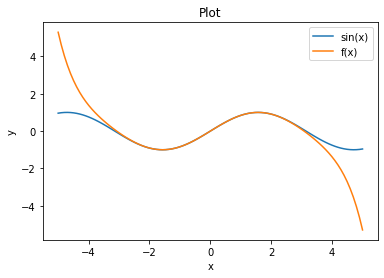

In [15]:
x = np.linspace(-5,5,100)

fig, ax = plt.subplots()
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, func(x), label='f(x)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Plot')
ax.legend()

# 2.3

In [22]:
r = float(input('Enter radius: '))
x = np.linspace(0, 2*np.pi, 100)

Enter radius: 5


Text(0.5, 1.0, 'Circle')

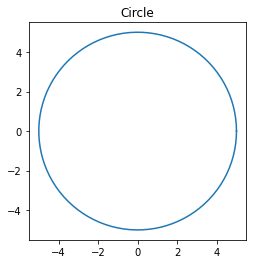

In [23]:
fig, ax = plt.subplots()
ax.plot(r * np.cos(x), r * np.sin(x))
plt.gca().set_aspect('equal')
plt.title('Circle')

# 2.4

In [24]:
def transformation_plot(x, matrix):
    return np.dot(x, matrix)

In [25]:
x = np.random.uniform(low=-1, high=1, size=(1000,2))
matrix = np.random.uniform(low=1, high=2, size=(2,2))
new_x = transformation_plot(x, matrix)

Text(0.5, 1.0, 'Points')

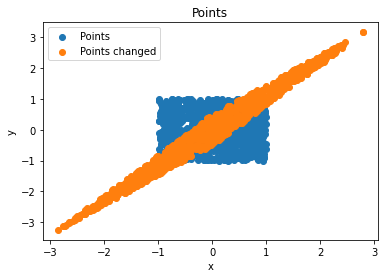

In [26]:
fig, ax = plt.subplots()
ax.scatter(x[:,0], x[:,1], label='Points')
ax.scatter(new_x[:,0], new_x[:,1], label='Points changed')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Points')

# 2.5

In [27]:
def diff_sin(x):
    h = 1e-5
    return (np.sin(x+h) - np.sin(x))/h

In [28]:
a = -5
b = 5

In [29]:
x = np.linspace(a, b ,100)

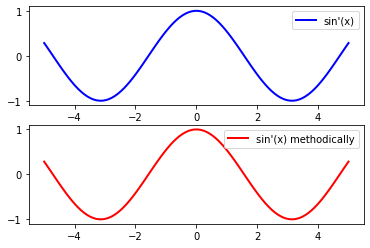

In [30]:
fig, ax = plt.subplots(nrows=2)
ax[0].plot(x, np.cos(x), linewidth=2,color='blue', label='sin\'(x)')
ax[1].plot(x, diff_sin(x), linewidth=2, color='red', label='sin\'(x) methodically')
ax[0].legend(); ax[1].legend()

# 2.6

In [31]:
def angle(v0, v1):
    unit_v0 = v0/np.linalg.norm(v0)
    unit_v1 = v1/np.linalg.norm(v1)
    return np.degrees(np.arccos(np.dot(unit_v0,unit_v1)))

In [34]:
n_vectors = int(input("Размер множества векторов: "))
vectors = np.random.uniform(low=-15, high=15, size = (n_vectors,3))
vector_q = np.random.uniform(low=-15, high=15, size = 3)

Размер множества векторов: 5


In [35]:
vectors

array([[-12.41663194, -13.08038697,   1.70323283],
       [ -9.97305681,  -9.85234679,  12.28146491],
       [ 10.10766117,   4.75526409, -12.98489541],
       [ -5.38469256,  -2.98535718,   2.11738196],
       [ -0.4899116 , -12.24260491,  13.15384113]])

In [36]:
vector_q

array([ 6.06604106, -6.64656163,  9.22825435])

In [37]:
prop_90 = 0
prop_30 = 0
for i in range(n_vectors):
    if(angle(vectors[i], vector_q) < 90):
        prop_90 += 1
    if(angle(vectors[i],vector_q) < 30):
        prop_30 += 1

print('Пропорция для 90*: ', prop_90/n_vectors)
print('Пропорция для 30*: ', prop_30/n_vectors)

Пропорция для 90*:  0.8
Пропорция для 30*:  0.0


# 2.8

In [38]:
def transform(x):
    return (x - np.mean(x, axis=0))/np.std(x, axis=0)

In [39]:
size = 1000
dim = 2

In [40]:
x  = np.random.uniform(low=5, high=15, size=(size,dim))
new_x = transform(x)

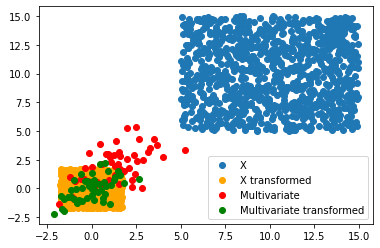

In [41]:
if(dim == 2):
    fig, ax = plt.subplots()
    rand = np.random.multivariate_normal(mean=[1,2], cov=[[2,1],[1,3]], size=50)
    transform_rand = transform(rand)
    ax.scatter(x[:,0], x[:,1], label='X')
    ax.scatter(new_x[:,0], new_x[:,1], color='orange', label='X transformed')
    ax.scatter(rand[:,0], rand[:,1], color='red', label='Multivariate')
    ax.scatter(transform_rand[:,0], transform_rand[:,1], color='green', label='Multivariate transformed')
    ax.legend()